In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
from Loader.ReadCSV import Reader
data = Reader.read_file(timeframe="M1").dropna()[['Close']]

In [73]:
split_percentage=0.7
split_point=round(len(data)*split_percentage)
train_data=data.iloc[:split_point]
test_data=data.iloc[split_point:]

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [75]:
def timeseries_preprocessing(scaled_train, scaled_test, lags):
    X,Y = [],[]
    for t in range(len(scaled_train)-lags-1):
        X.append(scaled_train[t:(t+lags),0])
        Y.append(scaled_train[(t+lags),0])

    Z,W = [],[]
    for t in range(len(scaled_test)-lags-1):
        Z.append(scaled_test[t:(t+lags),0])
        W.append(scaled_test[(t+lags),0])

    X_train, Y_train, X_test, Y_test=np.array(X), np.array(Y), np.array(Z),np.array(W)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train, Y_train, X_test, Y_test

In [76]:


X_train, Y_train, X_test,Y_test=timeseries_preprocessing(scaled_train, scaled_test, 20)

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model1/',save_best_only=True)

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(8,"relu"))
model.add(Dense(1,"linear"))
model.compile(optimizer=Adam(learning_rate=0.001),loss=MeanSquaredError(), metrics=RootMeanSquaredError())


In [114]:
history = model.fit(x=X_train,y=Y_train,epochs=10,validation_data=(X_test,Y_test),shuffle=False,callbacks=[cp])

Epoch 1/50
133/136 [============================>.] - ETA: 0s - loss: 0.0256 - root_mean_squared_error: 0.1599INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 14s 65ms/step - loss: 0.0251 - root_mean_squared_error: 0.1584 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1743
Epoch 2/50
136/136 [==============================] - 2s 16ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1936
Epoch 3/50
136/136 [==============================] - 2s 13ms/step - loss: 0.0132 - root_mean_squared_error: 0.1148 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1975
Epoch 4/50
136/136 [==============================] - 2s 13ms/step - loss: 0.0120 - root_mean_squared_error: 0.1093 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 5/50
136/136 [==============================] - 2s 15ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1819
Epoch 6/50
136/136 [==============================] - 2s 14ms/step - loss: 0.0091 - root_mean_squared_error: 0.0956 - val_loss: 0.0341 - val_root

INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 7s 48ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1600
Epoch 9/50
136/136 [==============================] - 2s 17ms/step - loss: 0.0045 - root_mean_squared_error: 0.0670 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1675
Epoch 10/50
136/136 [==============================] - 2s 14ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1641
Epoch 11/50
136/136 [==============================] - 2s 14ms/step - loss: 0.0030 - root_mean_squared_error: 0.0545 - val_loss: 0.0286 - val_root_mean_squared_error: 0.1690
Epoch 12/50
136/136 [==============================] - 2s 13ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1724
Epoch 13/50
136/136 [==============================] - 2s 13ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0306 - val_r

INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 6s 43ms/step - loss: 0.0012 - root_mean_squared_error: 0.0342 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 24/50
136/136 [==============================] - 2s 15ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1509
Epoch 25/50
131/136 [===========================>..] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0333INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 6s 44ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1485
Epoch 26/50
136/136 [==============================] - 2s 14ms/step - loss: 9.1718e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 27/50
135/136 [============================>.] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0393INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 18s 130ms/step - loss: 0.0015 - root_mean_squared_error: 0.0392 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1454
Epoch 28/50
136/136 [==============================] - 3s 19ms/step - loss: 0.0013 - root_mean_squared_error: 0.0357 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1644
Epoch 29/50
136/136 [==============================] - 2s 14ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1460
Epoch 30/50
136/136 [==============================] - 2s 14ms/step - loss: 8.6339e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1613
Epoch 31/50
134/136 [============================>.] - ETA: 0s - loss: 8.0918e-04 - root_mean_squared_error: 0.0284INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 9s 63ms/step - loss: 7.9989e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1359
Epoch 32/50
136/136 [==============================] - 2s 16ms/step - loss: 7.3289e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1514
Epoch 33/50
136/136 [==============================] - 2s 15ms/step - loss: 7.4954e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 34/50
136/136 [==============================] - 2s 14ms/step - loss: 7.3341e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1492
Epoch 35/50
133/136 [============================>.] - ETA: 0s - loss: 7.6544e-04 - root_mean_squared_error: 0.0277INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 6s 44ms/step - loss: 7.5568e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1321
Epoch 36/50
136/136 [==============================] - 2s 16ms/step - loss: 7.3817e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 37/50
136/136 [==============================] - 2s 14ms/step - loss: 7.6029e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 38/50
136/136 [==============================] - 2s 15ms/step - loss: 7.5778e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1393
Epoch 39/50
135/136 [============================>.] - ETA: 0s - loss: 7.6106e-04 - root_mean_squared_error: 0.0276INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 6s 47ms/step - loss: 7.5746e-04 - root_mean_squared_error: 0.0275 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1266
Epoch 40/50
136/136 [==============================] - 3s 21ms/step - loss: 7.3434e-04 - root_mean_squared_error: 0.0271 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1373
Epoch 41/50
132/136 [============================>.] - ETA: 0s - loss: 7.5754e-04 - root_mean_squared_error: 0.0275INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 7s 49ms/step - loss: 7.4276e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134
Epoch 42/50
136/136 [==============================] - 2s 17ms/step - loss: 7.0088e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1348
Epoch 43/50
136/136 [==============================] - ETA: 0s - loss: 7.3823e-04 - root_mean_squared_error: 0.0272INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 6s 47ms/step - loss: 7.3823e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 44/50
136/136 [==============================] - 2s 16ms/step - loss: 7.1052e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 45/50
134/136 [============================>.] - ETA: 0s - loss: 7.1865e-04 - root_mean_squared_error: 0.0268INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 6s 43ms/step - loss: 7.1044e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1091
Epoch 46/50
136/136 [==============================] - 2s 15ms/step - loss: 6.6828e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208
Epoch 47/50
136/136 [==============================] - 2s 15ms/step - loss: 6.6873e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1099
Epoch 48/50
136/136 [==============================] - ETA: 0s - loss: 6.3820e-04 - root_mean_squared_error: 0.0253INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 6s 44ms/step - loss: 6.3820e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1045
Epoch 49/50
136/136 [==============================] - 2s 16ms/step - loss: 6.3060e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1072
Epoch 50/50
133/136 [============================>.] - ETA: 0s - loss: 6.3612e-04 - root_mean_squared_error: 0.0252INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 6s 44ms/step - loss: 6.2809e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0983


Text(0.5, 1.0, 'Model fitting performance')

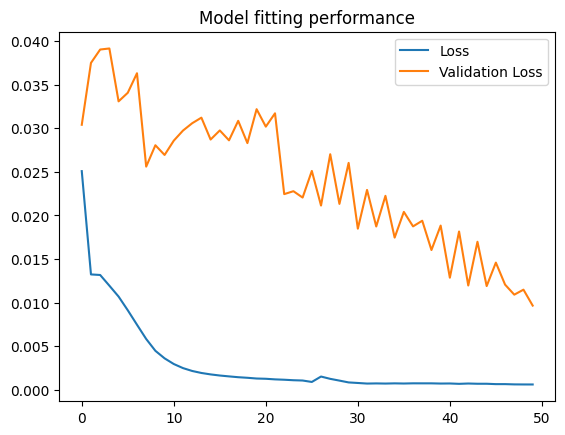

In [115]:
axes=plt.axes()
axes.plot(pd.DataFrame(model.history.history)['loss'], label='Loss')
axes.plot(pd.DataFrame(model.history.history)['val_loss'], label='Validation Loss')
axes.legend(loc=0)
axes.set_title('Model fitting performance')

In [116]:
from tensorflow.keras.models import load_model
model1=load_model('model1/')

Y_predicted=scaler.inverse_transform(model1.predict(X_test))
Y_true=scaler.inverse_transform(Y_test.reshape(Y_test.shape[0],1))

58/58 [==============================] - 1s 6ms/step


Text(0.5, 1.0, 'Prediction adjustment')

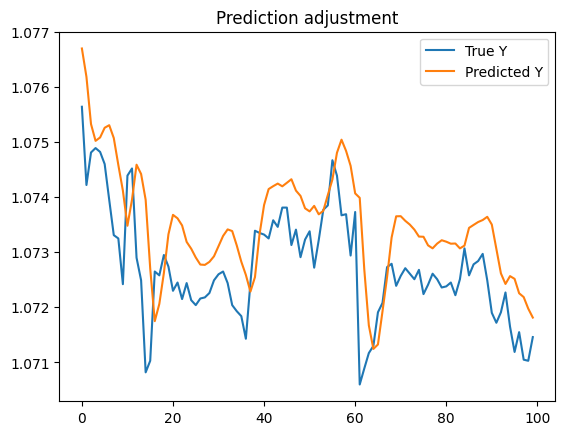

In [119]:
axes=plt.axes()
axes.plot(Y_true, label='True Y')
axes.plot(Y_predicted, label='Predicted Y')
axes.legend(loc=0)
axes.set_title('Prediction adjustment')

In [107]:
Y_predicted=scaler.inverse_transform(model.predict(X_test))
Y_true=scaler.inverse_transform(Y_test.reshape(Y_test.shape[0],1))

58/58 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Prediction adjustment')

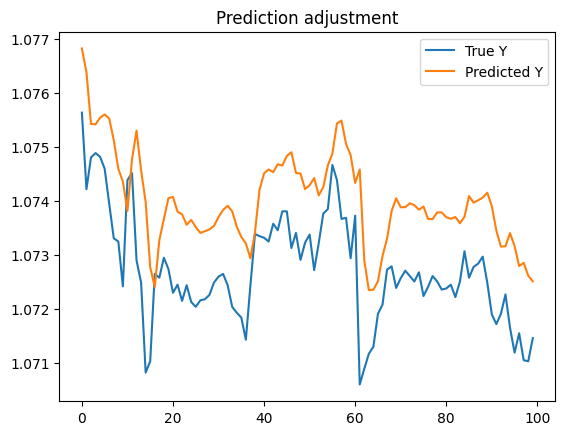

In [108]:
axes=plt.axes()
axes.plot(Y_true[:100], label='True Y')
axes.plot(Y_predicted[:100], label='Predicted Y')
axes.legend(loc=0)
axes.set_title('Prediction adjustment')

In [83]:
from sklearn import metrics
print('Model accuracy (%)')
Y_p=scaler.inverse_transform(model.predict(X_train))
Y_t=scaler.inverse_transform(Y_train.reshape(Y_train.shape[0],1))
print((1-(metrics.mean_absolute_error(Y_t, Y_p)/Y_t.mean()))*100)
print('')
print('Prediction performance')
print('MAE in %', (metrics.mean_absolute_error(Y_true, Y_predicted)/Y_true.mean())*100)
print('MSE', metrics.mean_squared_error(Y_true, Y_predicted))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_true, Y_predicted)))
print('R2', metrics.r2_score(Y_true, Y_predicted))


Model accuracy (%)
88/88 [==============================] - 3s 33ms/step
99.89977447847896

Prediction performance
MAE in % 0.09763316116578065
MSE 1.6434110853709918e-06
RMSE 0.0012819559607767312
R2 0.8845221127510002


In [120]:
from Models.transformer import transformer_model
import tensorflow as tf
input_shape = (X_train.shape[1], X_train.shape[2])
num_layers = 4
dff = 128
d_model = 10
num_heads = 10
dropout = 0.2
output_dim = 1

def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


model = transformer_model(input_shape, num_layers, dff, d_model, num_heads, dropout, output_dim)
model.compile(optimizer='adam', loss=rmse)

cp = ModelCheckpoint('model1/',save_best_only=True)

history = model.fit(x=X_train,y=Y_train,epochs=50,validation_data=(X_test,Y_test),shuffle=False, callbacks=[cp])


Epoch 1/50
136/136 [==============================] - ETA: 0s - loss: 0.1143INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 25s 77ms/step - loss: 0.1143 - val_loss: 0.3988
Epoch 2/50
136/136 [==============================] - ETA: 0s - loss: 0.1425INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 9s 65ms/step - loss: 0.1425 - val_loss: 0.3885
Epoch 3/50
136/136 [==============================] - ETA: 0s - loss: 0.1498INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 9s 67ms/step - loss: 0.1498 - val_loss: 0.3301
Epoch 4/50
136/136 [==============================] - 4s 30ms/step - loss: 0.1509 - val_loss: 0.3381
Epoch 5/50
136/136 [==============================] - 4s 29ms/step - loss: 0.1699 - val_loss: 0.3550
Epoch 6/50
136/136 [==============================] - 4s 27ms/step - loss: 0.1607 - val_loss: 0.3527
Epoch 7/50
136/136 [==============================] - 4s 27ms/step - loss: 0.1586 - val_loss: 0.3467
Epoch 8/50
136/136 [==============================] - 4s 28ms/step - loss: 0.1595 - val_loss: 0.3455
Epoch 9/50
135/136 [============================>.] - ETA: 0s - loss: 0.1658INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 9s 63ms/step - loss: 0.1651 - val_loss: 0.3252
Epoch 10/50
134/136 [============================>.] - ETA: 0s - loss: 0.1717INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 9s 66ms/step - loss: 0.1700 - val_loss: 0.3155
Epoch 11/50
134/136 [============================>.] - ETA: 0s - loss: 0.1749INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 11s 80ms/step - loss: 0.1730 - val_loss: 0.3073
Epoch 12/50
136/136 [==============================] - 4s 29ms/step - loss: 0.1748 - val_loss: 0.3158
Epoch 13/50
136/136 [==============================] - 4s 28ms/step - loss: 0.1761 - val_loss: 0.3434
Epoch 14/50
136/136 [==============================] - 4s 28ms/step - loss: 0.1761 - val_loss: 0.3661
Epoch 15/50
136/136 [==============================] - 4s 27ms/step - loss: 0.1767 - val_loss: 0.3875
Epoch 16/50
136/136 [==============================] - 4s 29ms/step - loss: 0.1768 - val_loss: 0.4064
Epoch 17/50
136/136 [==============================] - 4s 27ms/step - loss: 0.1754 - val_loss: 0.4116
Epoch 18/50
136/136 [==============================] - 4s 27ms/step - loss: 0.1744 - val_loss: 0.4176
Epoch 19/50
136/136 [==============================] - 4s 27ms/step - loss: 0.1752 - val_loss: 0.4283
Epoch 20/50
136/136 [==============================] - 4s 28ms/step - loss: 0.1776 - val_loss

INFO:tensorflow:Assets written to: model1\assets


136/136 [==============================] - 9s 64ms/step - loss: 0.0786 - val_loss: 0.2484


Text(0.5, 1.0, 'Model fitting performance')

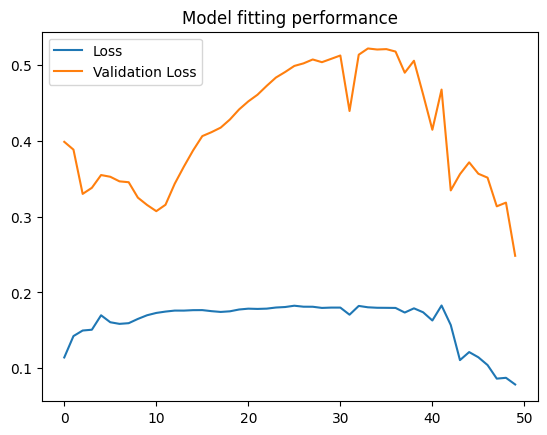

In [121]:
axes=plt.axes()
axes.plot(pd.DataFrame(model.history.history)['loss'], label='Loss')
axes.plot(pd.DataFrame(model.history.history)['val_loss'], label='Validation Loss')
axes.legend(loc=0)
axes.set_title('Model fitting performance')

In [124]:
from tensorflow.keras.models import load_model
model1=load_model('model1/',custom_objects={'rmse': rmse})

Y_predicted=scaler.inverse_transform(model1.predict(X_test))
Y_true=scaler.inverse_transform(Y_test.reshape(Y_test.shape[0],1))

58/58 [==============================] - 1s 12ms/step


Text(0.5, 1.0, 'Prediction adjustment')

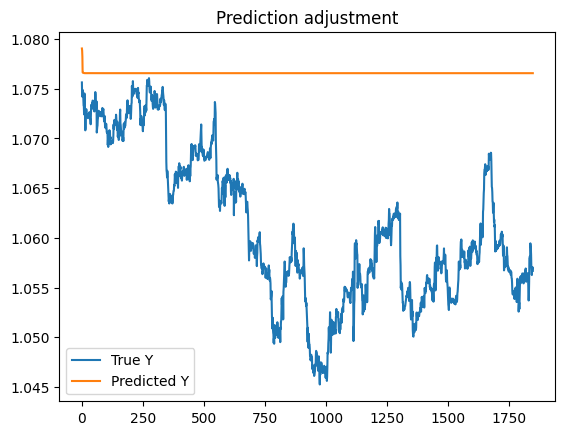

In [127]:
axes=plt.axes()
axes.plot(Y_true, label='True Y')
axes.plot(Y_predicted, label='Predicted Y')
axes.legend(loc=0)
axes.set_title('Prediction adjustment')


In [128]:
Y_predicted=(model.predict(X_test))
Y_true=(Y_test.reshape(Y_test.shape[0],1))

58/58 [==============================] - 3s 13ms/step


Text(0.5, 1.0, 'Prediction adjustment')

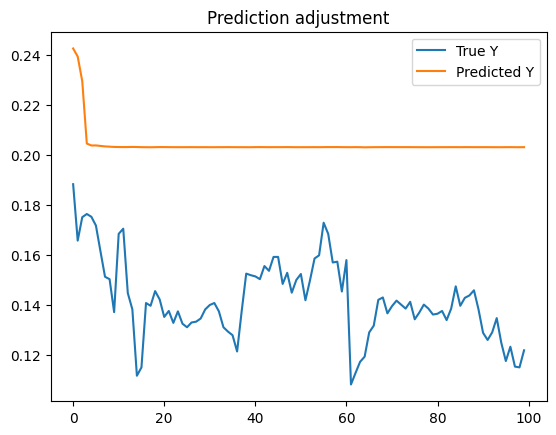

In [129]:
axes=plt.axes()
axes.plot(Y_true[:100], label='True Y')
axes.plot(Y_predicted[:100], label='Predicted Y')
axes.legend(loc=0)
axes.set_title('Prediction adjustment')

In [81]:
Y_predicted=scaler.inverse_transform(model.predict(X_test))
Y_true=scaler.inverse_transform(Y_test.reshape(Y_test.shape[0],1))

58/58 [==============================] - 1s 13ms/step


Text(0.5, 1.0, 'Prediction adjustment')

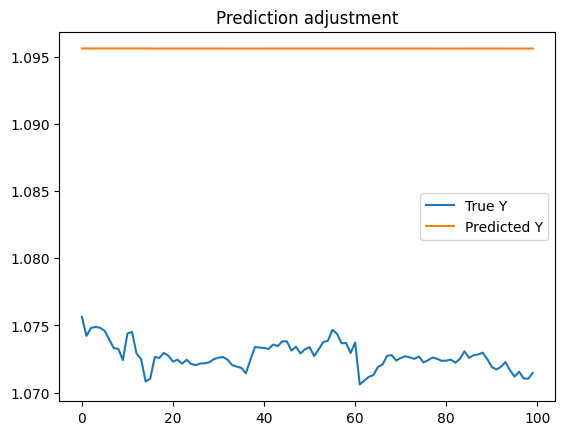

In [82]:
axes=plt.axes()
axes.plot(Y_true[:100], label='True Y')
axes.plot(Y_predicted[:100], label='Predicted Y')
axes.legend(loc=0)
axes.set_title('Prediction adjustment')

In [ ]:


print('Model accuracy (%)')
Y_p=scaler.inverse_transform(model.predict(X_train))
Y_t=scaler.inverse_transform(Y_train.reshape(Y_train.shape[0],1))
print((1-(metrics.mean_absolute_error(Y_t, Y_p)/Y_t.mean()))*100)
print('')
print('Prediction performance')
print('MAE in %', (metrics.mean_absolute_error(Y_true, Y_predicted)/Y_true.mean())*100)
print('MSE', metrics.mean_squared_error(Y_true, Y_predicted))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_true, Y_predicted)))
print('R2', metrics.r2_score(Y_true, Y_predicted))

In [ ]:
import numpy as np
import pandas as pd
from keras.src.layers import GlobalAveragePooling1D
from matplotlib import pyplot as plt

from Loader.ReadCSV import Reader
from feature_engineering.pipelines.AlphaPlusPipeline import alpha_plus_preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

data = Reader.read_file(timeframe="H1").dropna()[['Close']]

X_train,Y_train,X_test,Y_test=alpha_plus_preprocessing(data)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Conv1D
from tensorflow.keras.metrics import RootMeanSquaredError
model = Sequential()

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.models import Model

class MultiHeadSelfAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads
        self.wq = Dense(d_model)
        self.wk = Dense(d_model)
        self.wv = Dense(d_model)
        self.dense = Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        q = self.split_heads(self.wq(q), batch_size)
        k = self.split_heads(self.wk(k), batch_size)
        v = self.split_heads(self.wv(v), batch_size)

        scaled_attention, attention_weights = self.scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights

class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

def transformer_encoder(inputs, num_layers, dff, d_model, num_heads, dropout):
    attention_output = inputs
    mask = None
    for _ in range(num_layers):
        attention_output, _ = MultiHeadSelfAttention(
            d_model, num_heads)(attention_output, attention_output, attention_output, mask)
        attention_output = Dropout(dropout)(attention_output)
        attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)
        ffn_output = Dense(dff, activation='relu')(attention_output)
        ffn_output = Dense(d_model)(ffn_output)
        ffn_output = Dropout(dropout)(ffn_output)
        ffn_output = LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)
    return ffn_output

def transformer_model(input_shape, num_layers, dff, d_model, num_heads, dropout, output_dim):
    inputs = Input(shape=input_shape)
    x = PositionalEncoding(input_shape[0], d_model)(inputs)
    x = transformer_encoder(x, num_layers, dff, d_model, num_heads, dropout)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(output_dim, activation='linear')(x)  # Use linear activation for regression
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Example usage:
input_shape = (X_train.shape[1], X_train.shape[2])  # Sequence length and input dimension
num_layers = 4
dff = 512
d_model = 7
num_heads = 7
dropout = 0.1
output_dim = 1

model = transformer_model(input_shape, num_layers, dff, d_model, num_heads, dropout, output_dim)
model.compile(optimizer='adam', loss='mse')

# Train the model with your data




history = model.fit(x=X_train,y=Y_train,epochs=50,validation_data=(X_test,Y_test),shuffle=False)

axes=plt.axes()
axes.plot(pd.DataFrame(model.history.history)['loss'], label='Loss')
axes.plot(pd.DataFrame(model.history.history)['val_loss'], label='Validation Loss')
axes.legend(loc=0)
axes.set_title('Model fitting performance')
plt.show()

Y_predicted=(model.predict(X_test))
Y_true=(Y_test.reshape(Y_test.shape[0],1))

axes=plt.axes()
axes.plot(Y_true, label='True Y')
axes.plot(Y_predicted, label='Predicted Y')
axes.legend(loc=0)
axes.set_title('Prediction adjustment')
plt.show()

"""axes=plt.axes()
axes.plot(Y_true[:50], label='True Y')
axes.plot(Y_predicted[:50], label='Predicted Y')
axes.legend(loc=0)
axes.set_title('Prediction adjustment')
plt.show()
"""

from sklearn import metrics
print('Model accuracy (%)')
Y_p=(model.predict(X_train))
Y_t=(Y_train.reshape(Y_train.shape[0],1))
print((1-(metrics.mean_absolute_error(Y_t, Y_p)/Y_t.mean()))*100)
print('')
print('Prediction performance')
print('MAE in %', (metrics.mean_absolute_error(Y_true, Y_predicted)/Y_true.mean())*100)
print('MSE', metrics.mean_squared_error(Y_true, Y_predicted))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_true, Y_predicted)))
print('R2', metrics.r2_score(Y_true, Y_predicted))


In [61]:
data

,Close
datetime,
2023-05-01 00:00:00,1.10055
2023-05-01 01:00:00,1.10040
2023-05-01 02:00:00,1.10081
2023-05-01 03:00:00,1.10140
2023-05-01 04:00:00,1.10062
...,...
2023-10-27 16:00:00,1.05829
2023-10-27 17:00:00,1.05672
2023-10-27 18:00:00,1.05678
